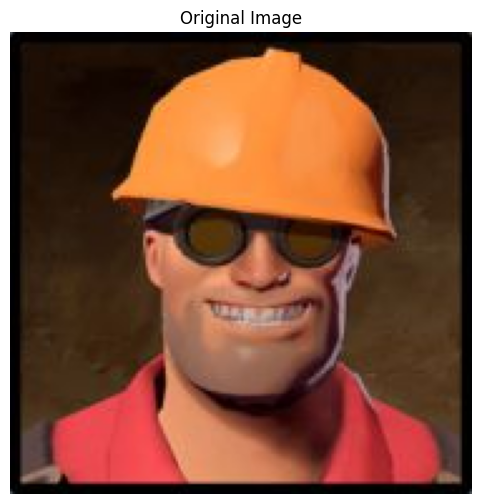

Image center: (92, 92)
Intensity at center: [ 67  92 172]
Intensity at center of patch: [ 50 158 168]


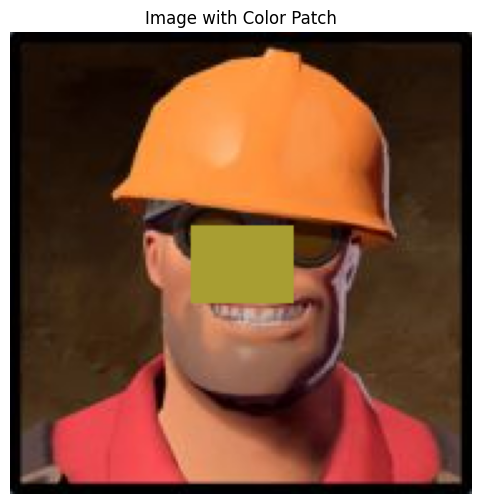

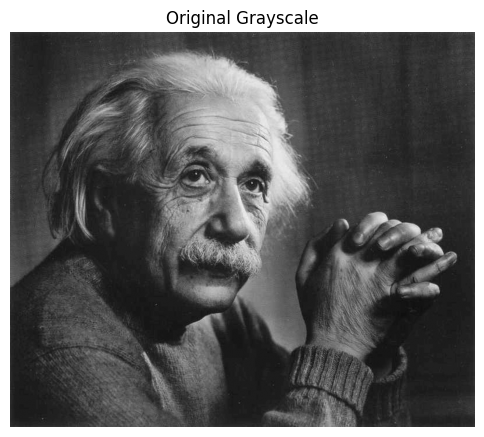

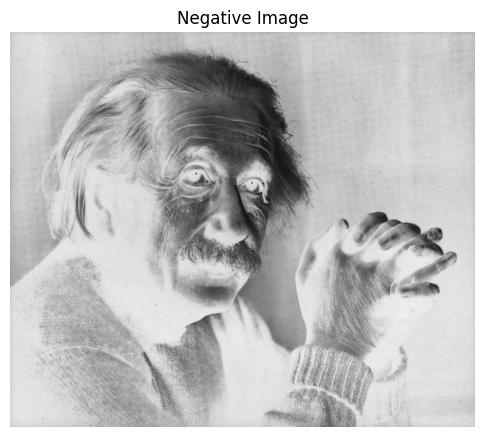

Pixel (240,62) - original: 106, negative: 149
Pixel (597,331) - original: 122, negative: 133
Pixel (72,63) - original: 100, negative: 155
Pixel (138,371) - original: 148, negative: 107
Pixel (41,189) - original: 108, negative: 147


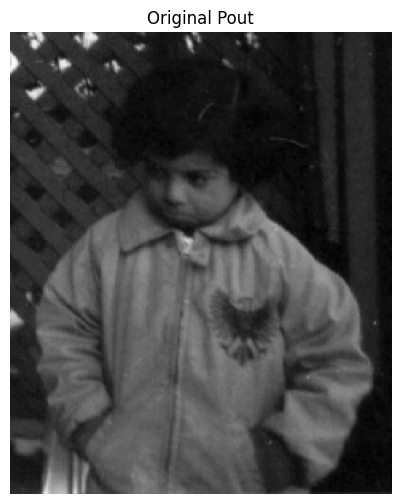

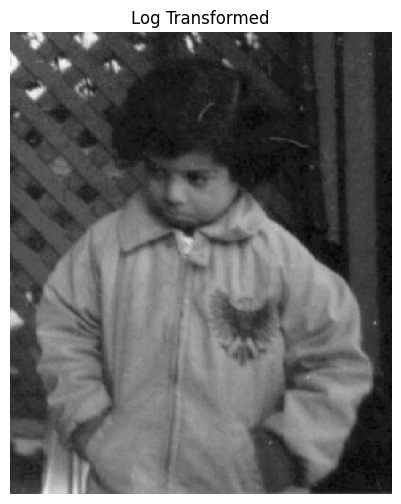

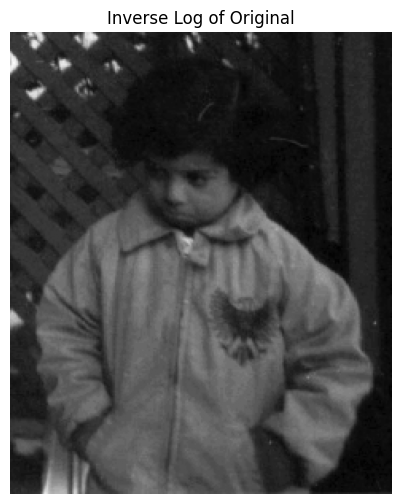

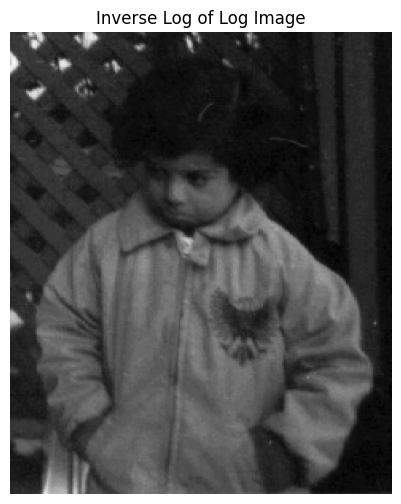

Log transform koyu bölgeleri aydınlatır. Inverse log işlemi tam geri dönüşüm sağlamaz; dinamik aralık kaybolabilir.


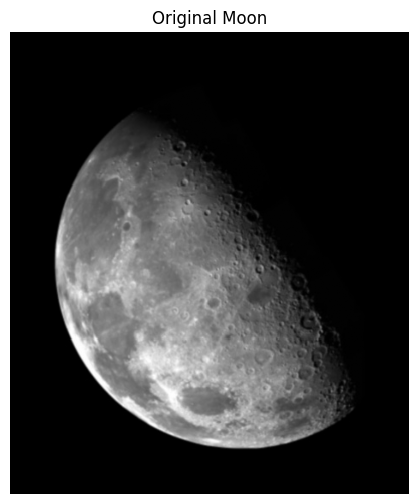

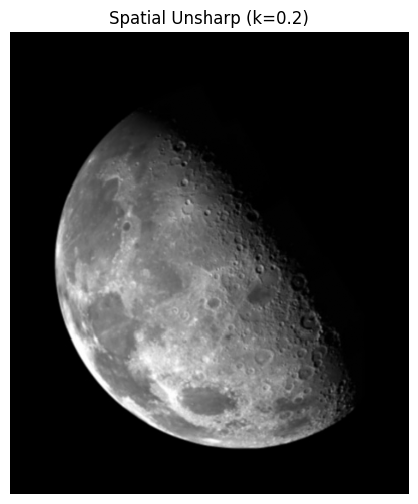

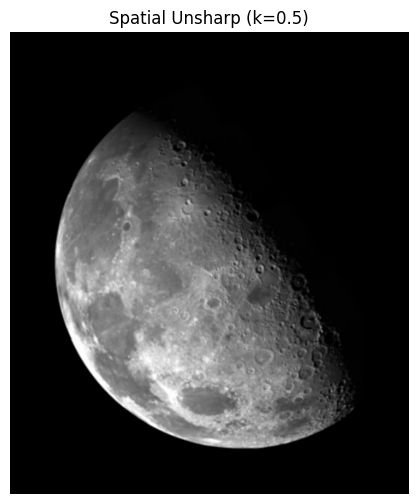

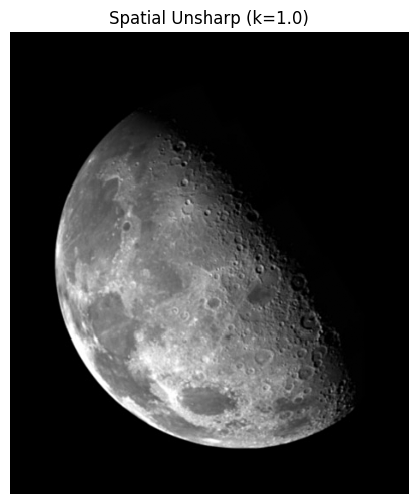

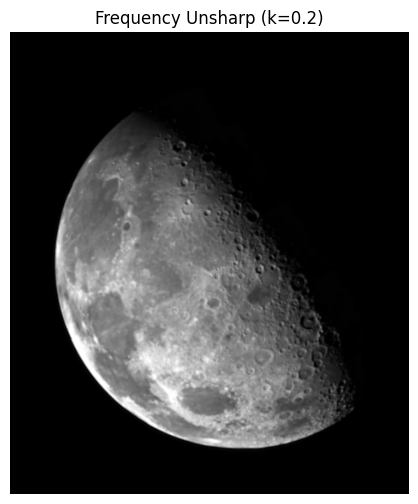

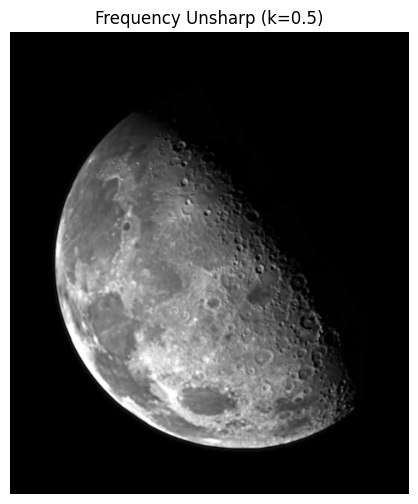

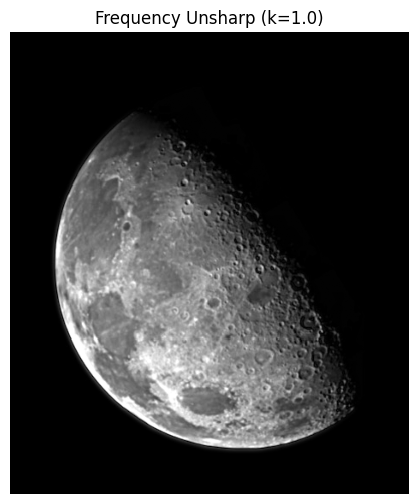

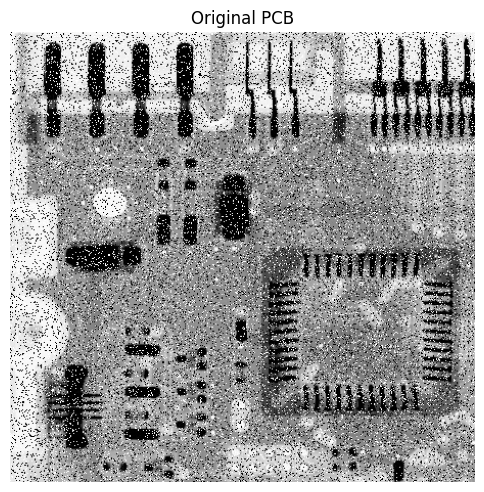

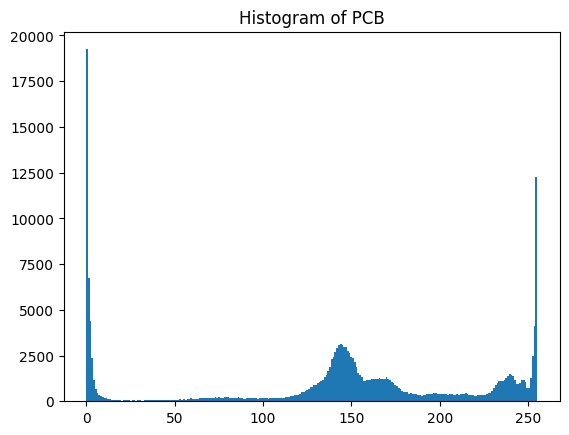

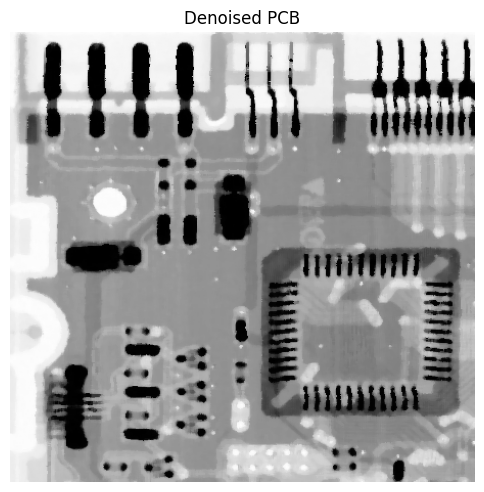

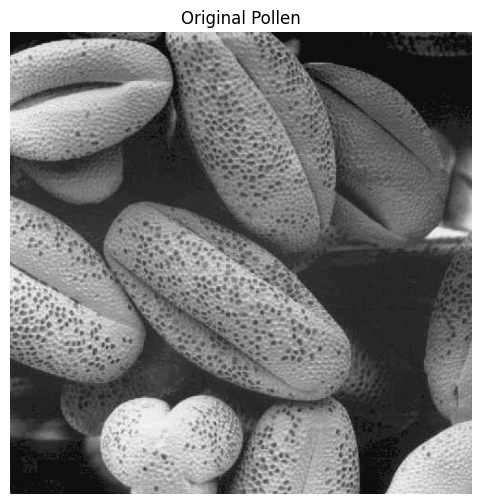

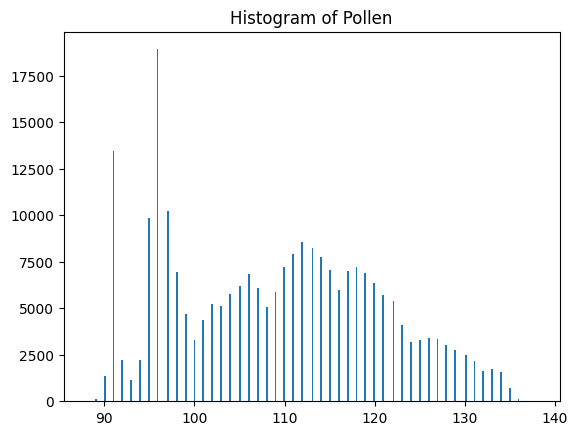

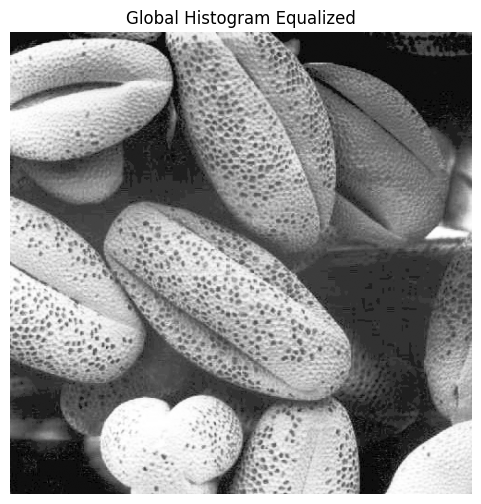

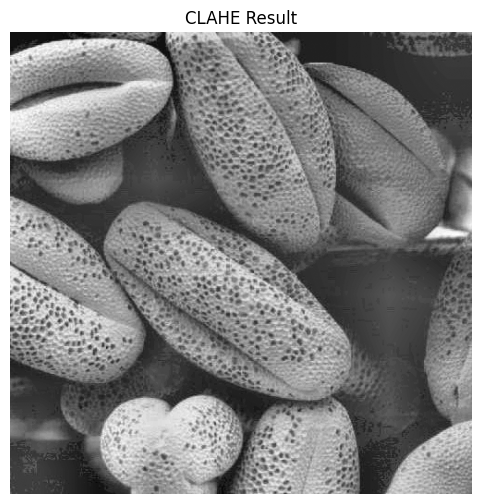

Global equalization, histogramı yayar ancak fazla artırabilir; CLAHE lokal kontrastı artırırken gürültüyü baskılar.


In [3]:

# UYG332 Final Project - Yusuf Kerem Dertsiz
# Student No: B2180.060021

import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def show_image(img, title="Image", cmap_type=None):
    if img is None:
        print(f"UYARI: {title} resmi bulunamadı!")
        return
    plt.figure(figsize=(6, 6))
    if cmap_type:
        plt.imshow(img, cmap=cmap_type)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

#####################################
# Problem 1 – tf2_engineer.jpg
#####################################
img1 = cv2.imread("images/tf2_engineer.jpg")
show_image(img1, "Original Image")

if img1 is not None:
    h, w, _ = img1.shape
    yc, xc = h // 2, w // 2
    center_intensity = img1[yc, xc]
    print(f"Image center: ({yc}, {xc})")
    print(f"Intensity at center: {center_intensity}")

    patch_color = (0x32, 0x9e, 0xa8)  # BGR
    patch_height, patch_width = 30, 40
    top_left = (xc - patch_width // 2, yc - patch_height // 2)
    bottom_right = (xc + patch_width // 2, yc + patch_height // 2)

    img1_with_patch = img1.copy()
    cv2.rectangle(img1_with_patch, top_left, bottom_right, patch_color, thickness=-1)

    patch_center_intensity = img1_with_patch[yc, xc]
    print(f"Intensity at center of patch: {patch_center_intensity}")
    show_image(img1_with_patch, "Image with Color Patch")

#####################################
# Problem 2 – einstein.tiff
#####################################
img2 = cv2.imread("images/einstein.tiff", cv2.IMREAD_GRAYSCALE)
show_image(img2, "Original Grayscale", cmap_type="gray")

if img2 is not None:
    img2_neg = 255 - img2
    show_image(img2_neg, "Negative Image", cmap_type="gray")

    for _ in range(5):
        y = random.randint(0, img2.shape[0] - 1)
        x = random.randint(0, img2.shape[1] - 1)
        print(f"Pixel ({y},{x}) - original: {img2[y,x]}, negative: {img2_neg[y,x]}")

#####################################
# Problem 3 – pout.tiff
#####################################
img3 = cv2.imread("images/pout.tiff", cv2.IMREAD_GRAYSCALE)
show_image(img3, "Original Pout", cmap_type="gray")

if img3 is not None:
    c = 255 / np.log(1 + np.max(img3))
    log_img = (c * np.log(img3 + 1)).astype(np.uint8)
    show_image(log_img, "Log Transformed", cmap_type="gray")

    exp_img = (np.exp(log_img / c) - 1).clip(0,255).astype(np.uint8)
    show_image(exp_img, "Inverse Log of Original", cmap_type="gray")

    inv_on_log = (np.exp((log_img) / c) - 1).clip(0,255).astype(np.uint8)
    show_image(inv_on_log, "Inverse Log of Log Image", cmap_type="gray")

    print("Log transform koyu bölgeleri aydınlatır. Inverse log işlemi tam geri dönüşüm sağlamaz; dinamik aralık kaybolabilir.")

#####################################
# Problem 4 – moon.tiff
#####################################
img4 = cv2.imread("images/moon.jpg", cv2.IMREAD_GRAYSCALE)
show_image(img4, "Original Moon", cmap_type="gray")

if img4 is not None:
    ksize = 5
    blur = cv2.GaussianBlur(img4, (ksize, ksize), 0)
    ks = [0.2, 0.5, 1.0]
    for k in ks:
        unsharp = cv2.addWeighted(img4, 1 + k, blur, -k, 0)
        show_image(unsharp, f"Spatial Unsharp (k={k})", cmap_type="gray")

    f = np.fft.fft2(img4)
    fshift = np.fft.fftshift(f)
    rows, cols = img4.shape
    crow, ccol = rows//2 , cols//2
    H = np.ones((rows, cols))
    D0 = 30
    for u in range(rows):
        for v in range(cols):
            D = np.sqrt((u-crow)**2 + (v-ccol)**2)
            H[u, v] = 1 - np.exp(-(D**2)/(2*(D0**2)))
    for k in ks:
        G = (1 + k * H) * fshift
        g = np.fft.ifft2(np.fft.ifftshift(G))
        g = np.abs(g).clip(0,255).astype(np.uint8)
        show_image(g, f"Frequency Unsharp (k={k})", cmap_type="gray")

#####################################
# Problem 5 – pcb.tiff
#####################################
img5 = cv2.imread("images/pcb.jpg", cv2.IMREAD_GRAYSCALE)
show_image(img5, "Original PCB", cmap_type="gray")
if img5 is not None:
    plt.figure(); plt.hist(img5.ravel(), bins=256); plt.title('Histogram of PCB'); plt.show()
    denoised = cv2.medianBlur(img5, 5)
    show_image(denoised, "Denoised PCB", cmap_type="gray")

#####################################
# Problem 6 – pollen.tiff
#####################################
img6 = cv2.imread("images/pollen.jpg", cv2.IMREAD_GRAYSCALE)
show_image(img6, "Original Pollen", cmap_type="gray")
if img6 is not None:
    plt.figure(); plt.hist(img6.ravel(), bins=256); plt.title('Histogram of Pollen'); plt.show()

    eq = cv2.equalizeHist(img6)
    show_image(eq, "Global Histogram Equalized", cmap_type="gray")

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(img6)
    show_image(cl, "CLAHE Result", cmap_type="gray")

    print("Global equalization, histogramı yayar ancak fazla artırabilir; CLAHE lokal kontrastı artırırken gürültüyü baskılar.")
